**Problem 1**

In [21]:
def forward_euler(gamma, beta, delta_t, N, I_0, S_0):
    S = [S_0]
    I = [I_0]
    R = [N-S_0-I_0]
    
    for t in range(1,51):
        s_t = S[t-1] + delta_t*((-beta*S[t-1]*I[t-1])/N)
        S.append(s_t)
        
        i_t = I[t-1] + delta_t*(((beta*S[t-1]*I[t-1])/N)-(gamma*I[t-1]))
        I.append(i_t)
        
        r_t = R[t-1] + delta_t*(gamma*I[t-1])
        R.append(r_t)
    
    return S, I, R

In [22]:
import matplotlib.pyplot as plt

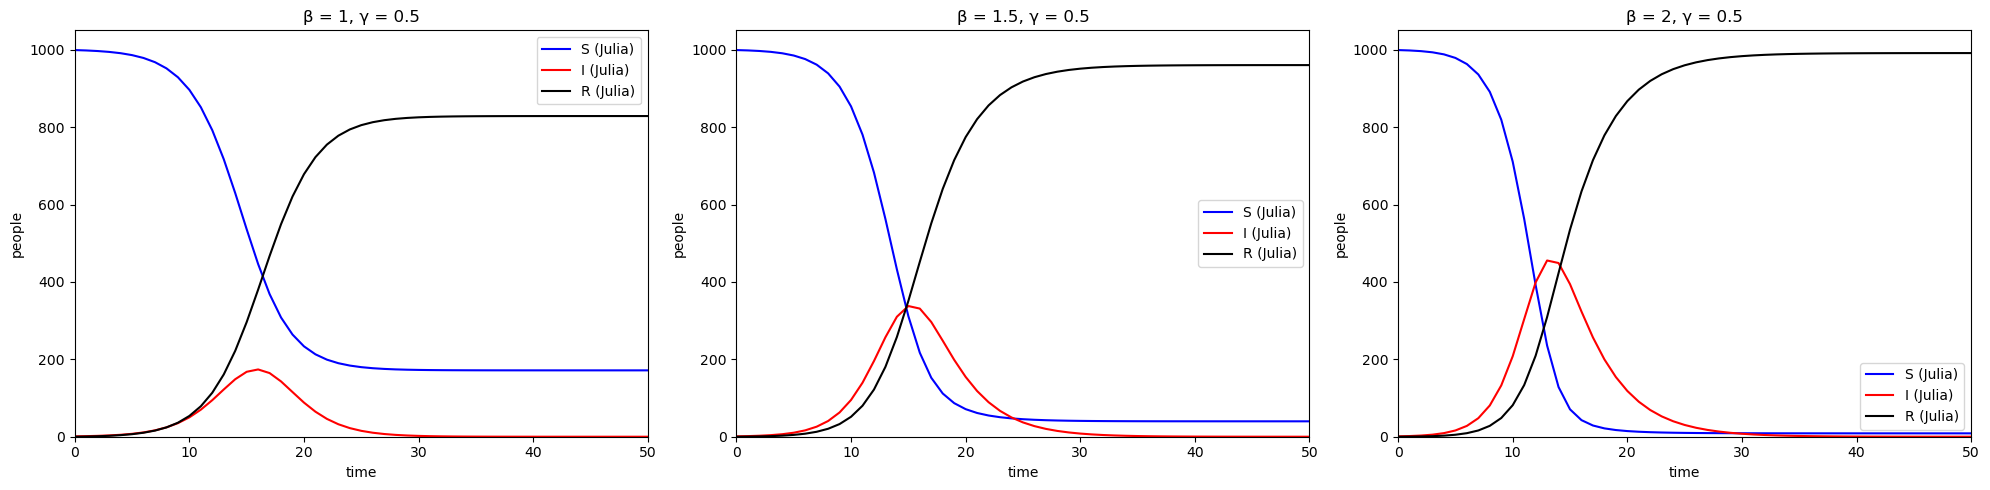

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Parameter sets
params = [(0.5, 1, 1), (0.5, 1.5, 0.6), (0.5, 2, 0.5)]
N = 1000
I_0 = 1
S_0 = 999

# Simulate and plot
for i, (gamma, beta, delta_t) in enumerate(params):
    S, I, R = forward_euler(gamma, beta, delta_t, N, I_0, S_0)
    axes[i].plot(S, label='S (Julia)', color='blue')
    axes[i].plot(I, label='I (Julia)', color='red')
    axes[i].plot(R, label='R (Julia)', color='black')
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("people")
    axes[i].set_title(f'β = {beta}, γ = {gamma}')
    axes[i].set_xlim([0, 50])
    axes[i].set_ylim([0, 1050])
    axes[i].legend()

plt.tight_layout()
plt.savefig("SIR Figures")
plt.show()


**Problem 3**

Part b

In [4]:
import numpy as np
from scipy.optimize import fsolve

In [20]:
def f(r_inf):
    return r_inf

def g(r_inf, R0):
    return 1- np.exp(-R0*r_inf)

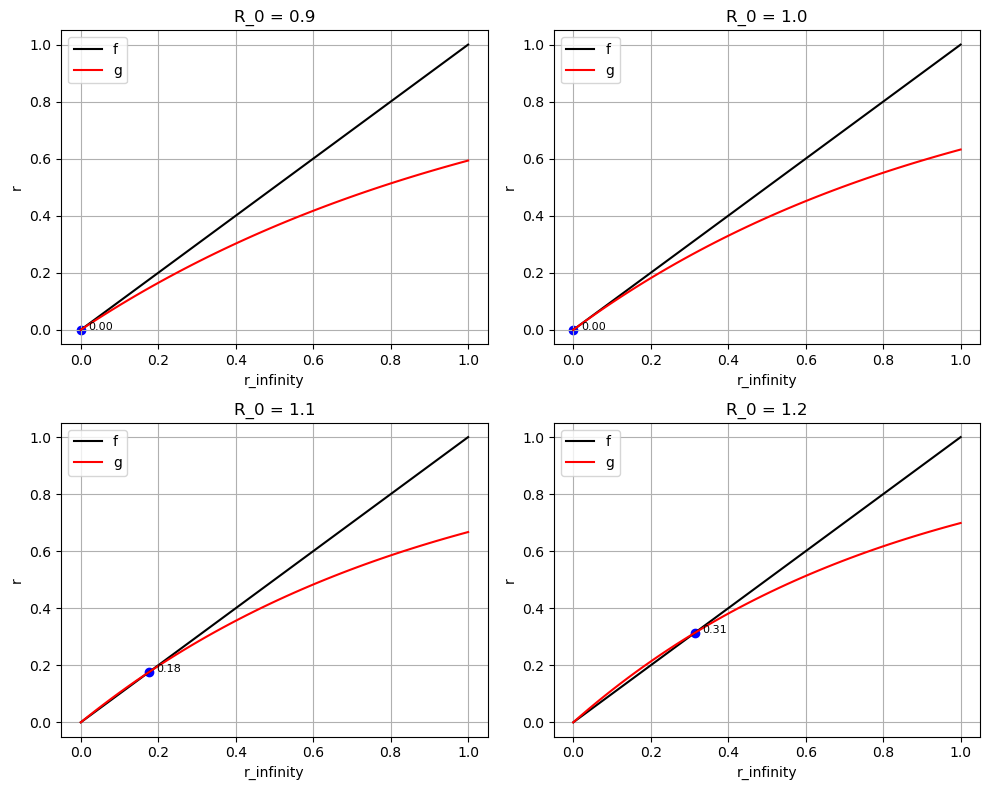

In [13]:
R_0 = [0.9, 1.0, 1.1, 1.2]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, R0 in enumerate(R_0):
    row = i//2
    col = i%2
    
    r_inf_vals = np.linspace(0,1)
    f_vals = f(r_inf_vals)
    g_vals = g(r_inf_vals, R0)
    
    axes[row, col].plot(r_inf_vals, f_vals, color = "black", label = 'f')
    axes[row, col].plot(r_inf_vals, g_vals, color = "red", label = 'g')
    axes[row, col].set_xlabel('r_infinity')
    axes[row, col].set_ylabel('r')
    axes[row, col].set_title(f'R_0 = {R0}')
    axes[row, col].legend()
    axes[row, col].grid(True)
    
    # intersection
    intersection_pt = fsolve(lambda x: f(x) - g(x,R0), 0.5)
    axes[row, col].scatter(intersection_pt, f(intersection_pt), color = "blue")
    axes[row, col].text(intersection_pt + 0.02, f(intersection_pt), f'{intersection_pt[0]:.2f}', fontsize=8)
    
plt.tight_layout()
plt.savefig('Outbreak_Stability.png')
plt.show()

Part d

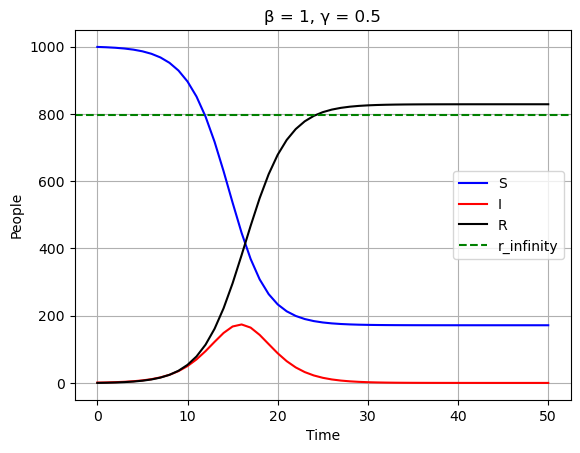

In [34]:
gamma = 0.5
beta = 1
delta_t = 1
N = 1000
I_0 = 1
S_0 = 999
R_0 = beta/gamma

S, I, R = forward_euler(gamma, beta, delta_t, N, I_0, S_0)

def calculate_final_size(r_inf, R_0):
    return r_inf - (1-np.exp(-R_0*r_inf))

final_size = fsolve(calculate_final_size, 0.5, args=(R_0,))

plt.plot(S, label = 'S', color = 'blue')
plt.plot(I, label = 'I', color = 'red')
plt.plot(R, label = 'R', color = 'black')

plt.axhline(y = final_size*N, color = 'green', linestyle = '--', label = 'r_infinity')
plt.xlabel('Time')
plt.ylabel('People')
plt.title('β = 1, γ = 0.5')
plt.legend()
plt.grid(True)
plt.savefig("Final_Size_Prediction.png")
plt.show()
